## Lab Customer Analysis Round 3

In [1]:
# Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
#File upload "marketing_customer_analysis" and creation of "Mktcus" df
Mktcus = pd.read_csv("marketing_customer_analysis.csv")

## Data Cleaning

In [27]:
# Header Check
Mktcus.head()

,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [29]:
# Standardizing headers - Removing spaces
Mktcus.columns = Mktcus.columns.str.replace(' ','')

In [30]:
# Standardizing headers - Making all lower case
Mktcus.columns = Mktcus.columns.str.lower()

In [31]:
# Header check
Mktcus.head()

,customer,state,customerlifetimevalue,response,coverage,education,effectivetodate,employmentstatus,gender,income,...,monthssincepolicyinception,numberofopencomplaints,numberofpolicies,policytype,policy,renewoffertype,saleschannel,totalclaimamount,vehicleclass,vehiclesize
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Analysis

In [32]:
#1/ Show DataFrame info
Mktcus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer                    9134 non-null   object 
 1   state                       9134 non-null   object 
 2   customerlifetimevalue       9134 non-null   float64
 3   response                    9134 non-null   object 
 4   coverage                    9134 non-null   object 
 5   education                   9134 non-null   object 
 6   effectivetodate             9134 non-null   object 
 7   employmentstatus            9134 non-null   object 
 8   gender                      9134 non-null   object 
 9   income                      9134 non-null   int64  
 10  locationcode                9134 non-null   object 
 11  maritalstatus               9134 non-null   object 
 12  monthlypremiumauto          9134 non-null   int64  
 13  monthssincelastclaim        9134 

In [35]:
#2/ Describe dataframe
Mktcus.describe()

,customerlifetimevalue,income,monthlypremiumauto,monthssincelastclaim,monthssincepolicyinception,numberofopencomplaints,numberofpolicies,totalclaimamount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [37]:
#3/ Show a plot of the total number of responses
Mktcus['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

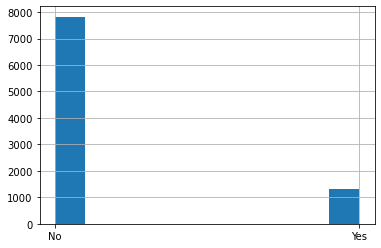

In [38]:
#3.1/ Histogram visual
Mktcus['response'].hist()
plt.show()

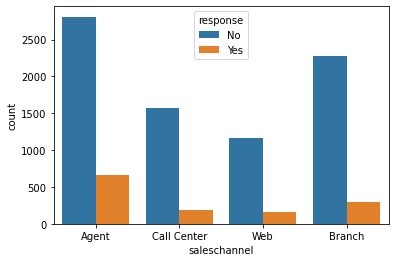

In [40]:
#4/ Show a plot of response rate by sales channel
sns.countplot(x="saleschannel",hue="response",data=Mktcus)
plt.show()

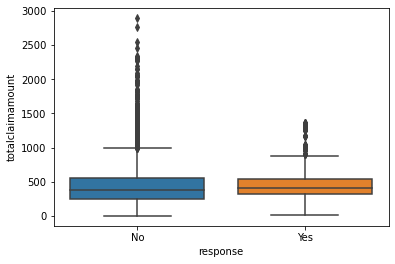

In [62]:
#5/ Show a plot of response rate by total claim amount
sns.boxplot(x="response", y="totalclaimamount", data=Mktcus)
plt.show()

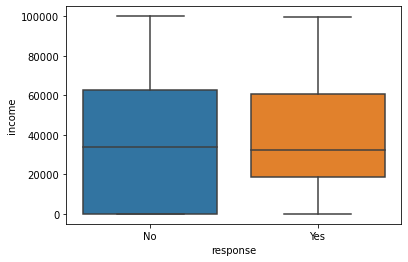

In [63]:
#6/ Show a plot of the response rate by income
sns.boxplot(x="response", y="income", data=Mktcus)
plt.show()